# K-Means Clustering Assignment
---

## CIA Country Analysis and Clustering

Source: All these data sets are from the US government website. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

### Goal: 

The goal of this assignment is to gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent? *Note: There is no 100% right answer.*

## Q1: Imports and Data Loading

In [216]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [217]:
# Load data

df = pd.read_csv('../Data/CIA_data.csv')

df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Q2: EDA and Visualization

1. Explore the rows and columns of the data as well as the data types of the columns.
2. Create a histogram of the Population column.
3. You should notice the histogram is skewed due to a few large countries, reset the X axis to only show countries with less than 0.5 billion people.
4. Let's explore GDP and Regions. Create a bar plot showing the mean GDP per Capita per region (recall the black bar represents std).
5. Create a scatterplot showing the relationship between Phones per 1000 people and the GDP per Capita. Color these points by Region.
6. Create a scatterplot showing the relationship between GDP per Capita and Literacy (color the points by Region). What conclusions do you draw from this plot?
7. Create a Heatmap of the Correlation between columns in the DataFrame.
8. Seaborn can auto perform hierarchal clustering through the clustermap() function. Create a clustermap of the correlations between each column with this function.

In [218]:
# 1. Explore data

# Display the number of rows and columns

print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset contains 227 rows and 20 columns.


In [219]:
# Data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [220]:
# Display the column names and data types

print('Column names and data types:\n')
print(df.dtypes)

Column names and data types:

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object


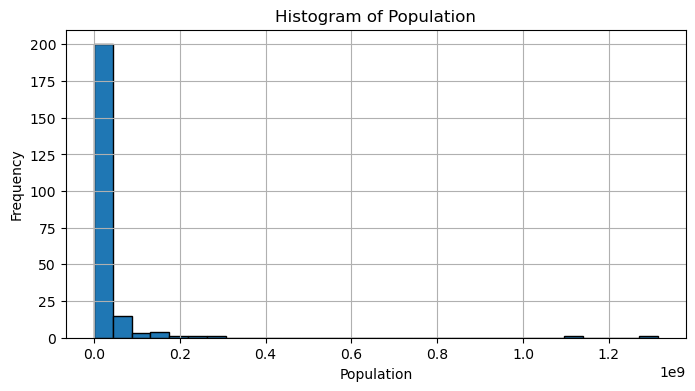

In [221]:
# Population histogram

plt.figure(figsize=(8,4))
plt.hist(df['Population'], bins=30, edgecolor='black')
plt.title('Histogram of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [222]:
# Population histogram 2

# Filter the data to include only countries with population less than 0.5 billion

filtered_data = df[df['Population'] < 500000000]

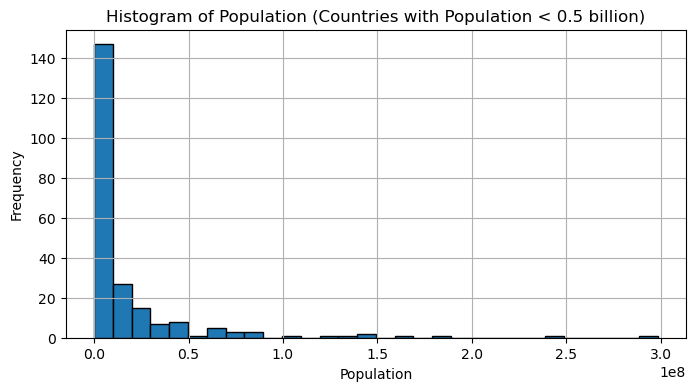

In [223]:
# Create a histogram of the filtered Population column

plt.figure(figsize=(8,4))
plt.hist(filtered_data['Population'], bins=30, edgecolor='black')
plt.title('Histogram of Population (Countries with Population < 0.5 billion)')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [224]:
# Calculate the mean GDP per capita and standard deviation per region

gdp_per_region = df.groupby('Region')['GDP ($ per capita)'].agg(['mean', 'std']).reset_index()

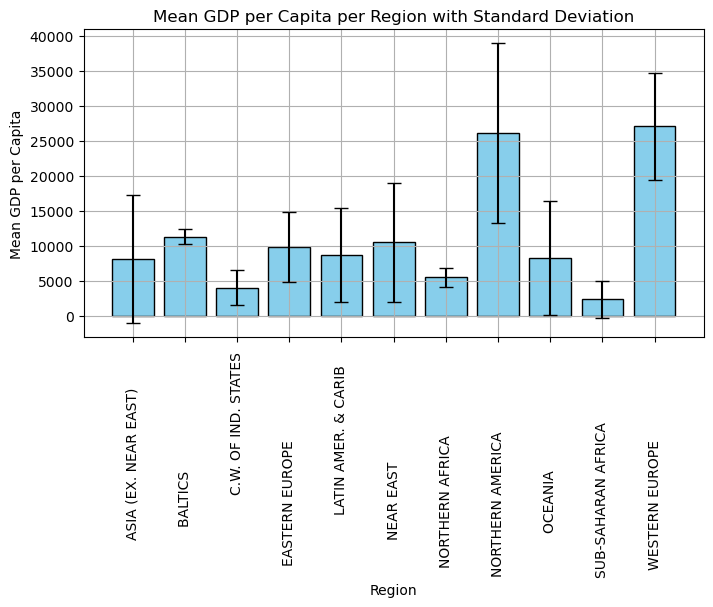

In [225]:
# GDP per capita per region barplot

plt.figure(figsize=(8,4))
plt.bar(gdp_per_region['Region'], gdp_per_region['mean'], yerr=gdp_per_region['std'], capsize=5, color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Mean GDP per Capita per Region with Standard Deviation')
plt.xlabel('Region')
plt.ylabel('Mean GDP per Capita')
plt.grid(True)
plt.show()

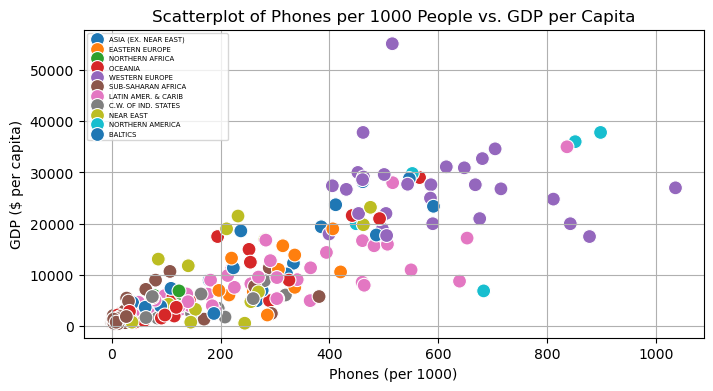

In [226]:
# Scatterplot (phones per 1000 people and GDP per capita)

plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Phones (per 1000)', y='GDP ($ per capita)', hue='Region', palette='tab10', s=100)
plt.title('Scatterplot of Phones per 1000 People vs. GDP per Capita')
plt.xlabel('Phones (per 1000)')
plt.ylabel('GDP ($ per capita)')
plt.legend(fontsize=5)
plt.grid(True)
plt.show()

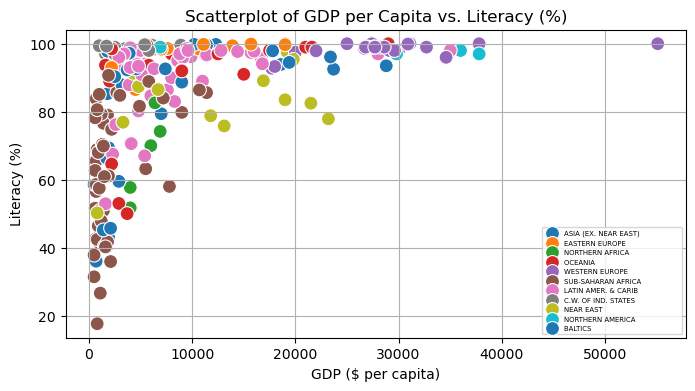

In [227]:
# Scatterplot (GDP per capita and literacy)

plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Literacy (%)', hue='Region', palette='tab10', s=100)
plt.title('Scatterplot of GDP per Capita vs. Literacy (%)')
plt.xlabel('GDP ($ per capita)')
plt.ylabel('Literacy (%)')
plt.grid(True)
plt.legend(fontsize=5)
plt.show()

+ There is a general trend that countries with higher GDP per capita tend to have higher literacy rates. This suggests a positive correlation between economic prosperity and education levels.
+ There are a few outliers where countries have high literacy rates but relatively lower GDP per capita. This might indicate strong education systems despite economic challenges.
+ There are noticeable clusters of countries by region, indicating that geographic and regional factors play a significant role in the economic and educational development of countries.

In [228]:
# Calculate the correlation matrix

correlation_matrix = df.corr(numeric_only=True)

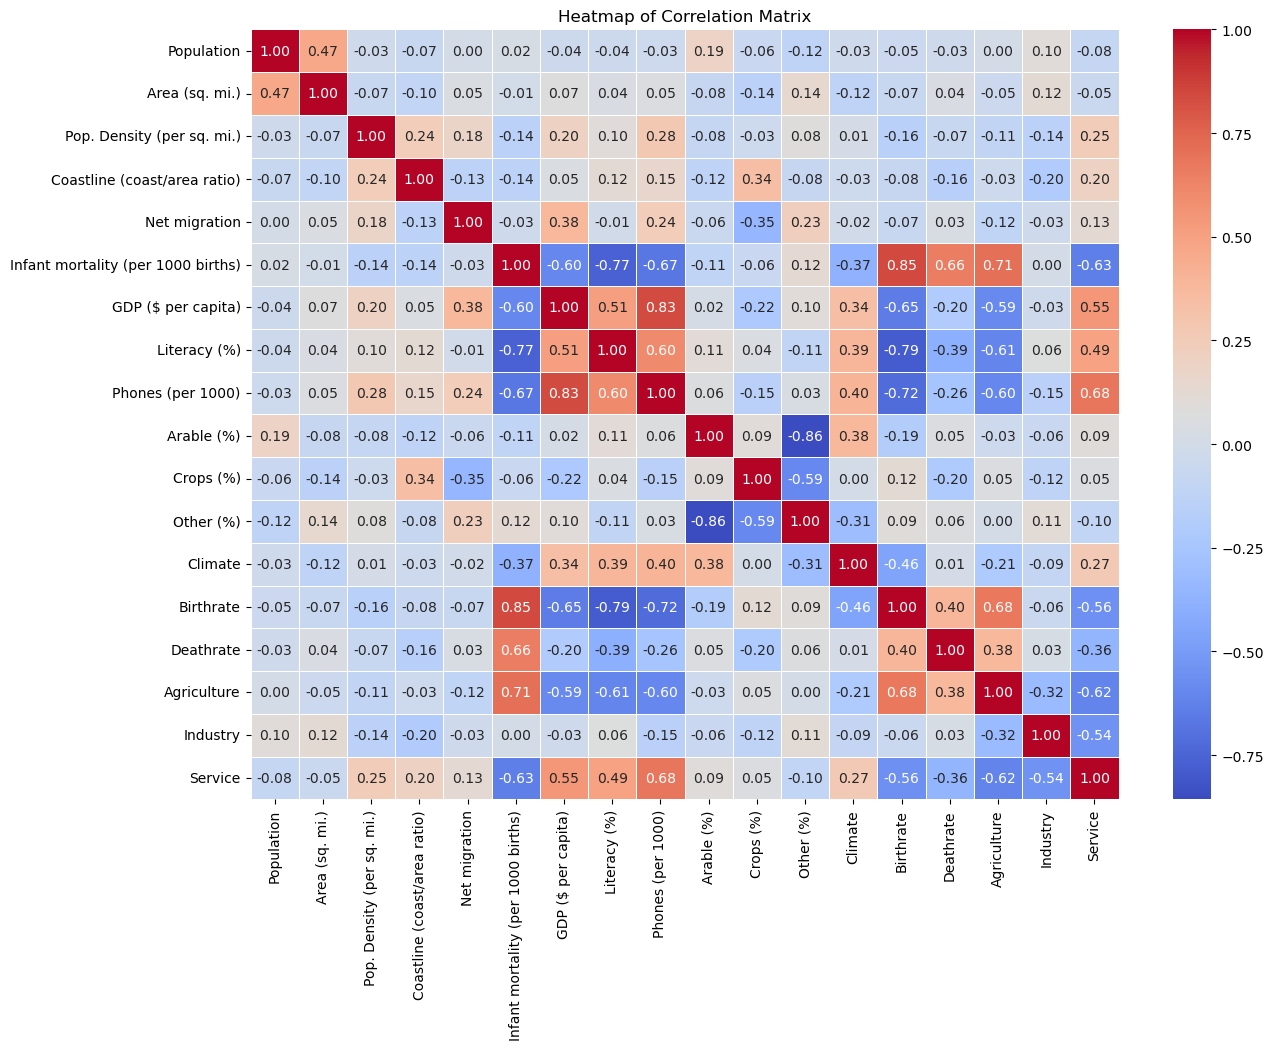

In [229]:
# Correlation heatmap

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

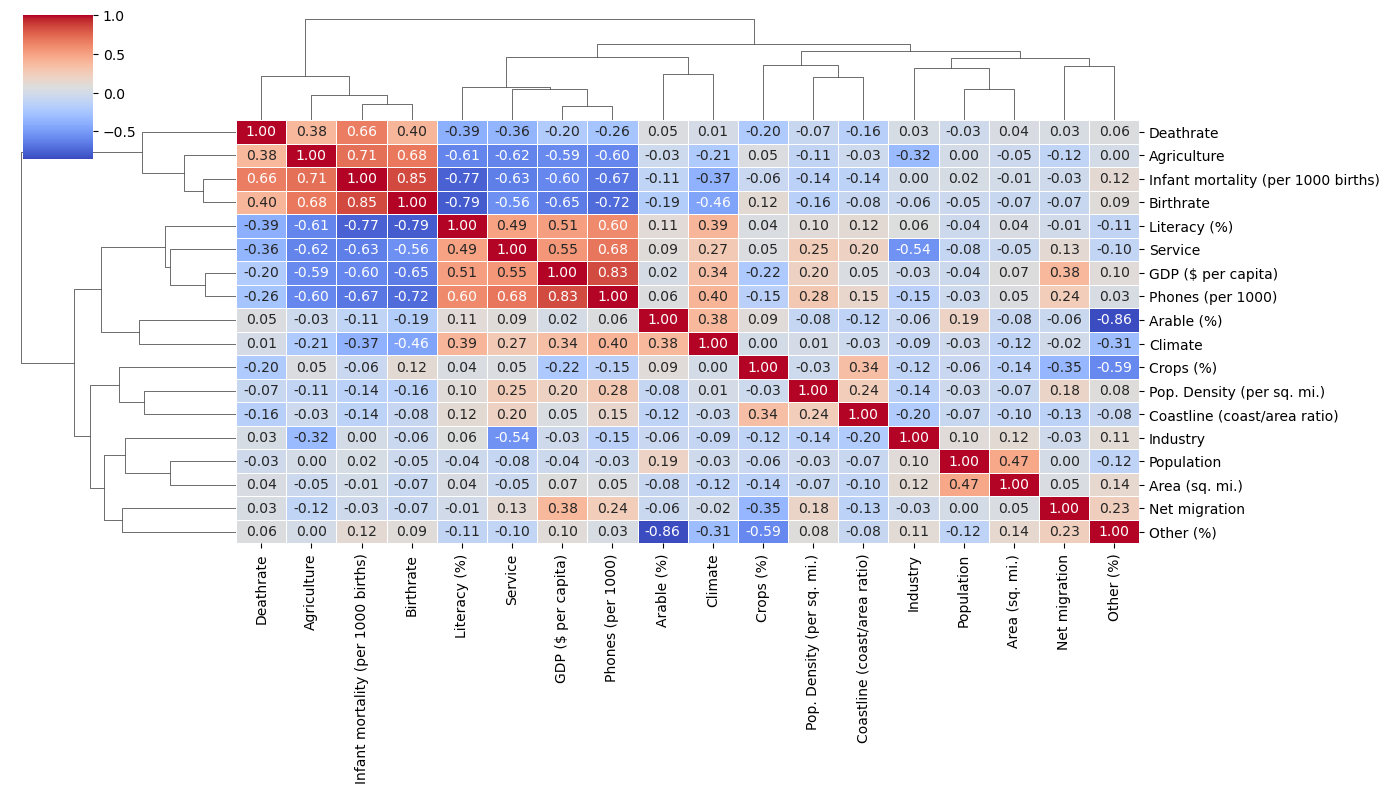

In [230]:
# Clustermap

sns.clustermap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, figsize=(14, 8))

plt.show()

## Q3: Data Cleaning

1. Report the number of missing values per colum.
2. What countries have NaN for Agriculture? What is the main aspect of these countries?
3. You should have noticed most of these countries are tiny islands, with the exception of Greenland and Western Sahara. Go ahead and fill any of these countries missing NaN values with 0, since they are so small or essentially non-existent. There should be 15 countries in total you do this for. For a hint on how to do this, recall you can do the following:

        df[df['feature'].isnull()]

4. Now check to see what is still missing by counting number of missing elements again per feature.
5. Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

6. Deal with the remaining missing values.

In [231]:
# Missing values

missing_values = df.isnull().sum()

print(missing_values)

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


In [232]:
# Agriculture NaN

countries_with_nan_agriculture=df[df['Agriculture'].isna()]['Country']
countries_with_nan_agriculture

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [233]:
# Fill NaN values with 0 for these small or essentially non-existent countries

df.loc[df['Agriculture'].isna(), 'Agriculture'] = 0

In [234]:
# Verify the changes

df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                            0
Industry                              16
Service                               15
dtype: int64

In [235]:
# Remove small islands

# Define the list of small islands to remove

small_islands = [
    "Anguilla", "Antigua and Barbuda", "Aruba", "Bahamas, The", "Barbados", 
    "Bermuda", "British Virgin Islands", "Cayman Islands", "Cook Islands", 
    "Dominica", "Falkland Islands (Islas Malvinas)", "Faroe Islands", 
    "French Polynesia", "Gibraltar", "Greenland", "Grenada", 
    "Guam", "Guernsey", "Isle of Man", "Jersey", "Kiribati", 
    "Liechtenstein", "Malta", "Monaco", "Nauru", "New Caledonia", 
    "Niue", "Northern Mariana Islands", "Palau", "Saint Kitts and Nevis", 
    "Saint Lucia", "Saint Pierre and Miquelon", "Saint Vincent and the Grenadines", 
    "Samoa", "San Marino", "Sao Tome and Principe", "Seychelles", 
    "Solomon Islands", "Tonga", "Turks and Caicos Islands", "Tuvalu", 
    "Vanuatu", "Vatican City"
]

# Remove the small islands from the dataset

data_cleaned = df[~df['Country'].isin(small_islands)]

# Display the first few rows of the cleaned dataset

data_cleaned.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,NaN,NaN


In [236]:
# Remaining missing values

data_cleaned.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          2
Infant mortality (per 1000 births)     2
GDP ($ per capita)                     1
Literacy (%)                           8
Phones (per 1000)                      4
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               17
Birthrate                              3
Deathrate                              3
Agriculture                            0
Industry                              10
Service                                9
dtype: int64

In [237]:
# Fill missing climate values
 
# Find the most frequent value in the 'Climate' column

clima_frequency = data_cleaned['Climate'].value_counts().idxmax()

# Fill missing values in the 'Climate' column with the most frequent value

data_cleaned.loc[data_cleaned['Climate'].isna(), 'Climate'] = clima_frequency

In [238]:
# Deal with literacy missing values

# Calculate the mean of the 'Literacy (%)' column

Literacy_mean = data_cleaned['Literacy (%)'].mean()

# Fill missing values in the 'Literacy (%)' column with the calculated mean

data_cleaned.loc[data_cleaned['Literacy (%)'].isna(), 'Literacy (%)'] = Literacy_mean

In [239]:
# Verify the changes

data_cleaned.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          2
Infant mortality (per 1000 births)     2
GDP ($ per capita)                     1
Literacy (%)                           0
Phones (per 1000)                      4
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              3
Deathrate                              3
Agriculture                            0
Industry                              10
Service                                9
dtype: int64

In [240]:
# Drop remaining rows with missing values

data_cleaned = data_cleaned.dropna()

In [241]:
# Verify the changes

data_cleaned.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

## Q4: Data Preparation

1. The Country column is still a unique identifier string, so it won't be useful for clustering, since its unique for each point. Go ahead and drop this Country column.
2. The Region column is still categorical strings, use Pandas to create dummy variables from this column to create a finalized X matrix of continuous features along with the dummy variables for the Regions.
3. Use sklearn to scale the X feature matrix.

In [242]:
# Drop country

data_cleaned = data_cleaned.drop(columns=["Country"])
data_cleaned.head()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
5,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,2.0,45.11,24.20,0.096,0.658,0.246
7,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


In [243]:
# Dummy variables

data_with_dummies = pd.get_dummies(data_cleaned, columns=['Region'])
data_with_dummies

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,...,False,False,False,False,False,False,False,False,False,False
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,...,False,False,True,False,False,False,False,False,False,False
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,...,False,False,False,False,False,True,False,False,False,False
5,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.000000,7.8,2.41,...,False,False,False,False,False,False,False,False,True,False
7,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.000000,549.9,18.18,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,108605,1910,56.9,9.84,-8.94,8.03,17200.0,81.748387,652.8,11.76,...,False,False,False,True,False,False,False,False,False,False
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,81.748387,145.2,16.90,...,False,False,False,False,True,False,False,False,False,False
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,...,False,False,False,False,True,False,False,False,False,False
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,...,False,False,False,False,False,False,False,False,True,False


In [244]:
# Scale X

# Separate the features

X = data_with_dummies

# Scale the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Q5: Creating and Fitting Kmeans Model

1. Use a for loop to create and fit multiple KMeans models, testing from K=2-30 clusters. Keep track of the Sum of Squared Distances for each K value, then plot this out to create an "elbow" plot of K versus SSD. Optional: You may also want to create a bar plot showing the SSD difference from the previous cluster.
2. What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices. As this is unsupervised learning, there is no 100% correct answer here.

In [245]:
# Create multiple models

# Initialize an empty list to store the Sum of Squared Distances (SSD)

ssd = []

# Loop through different values of K (from 2 to 30)

for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

C:\Users\info\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\info\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\info\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\info\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

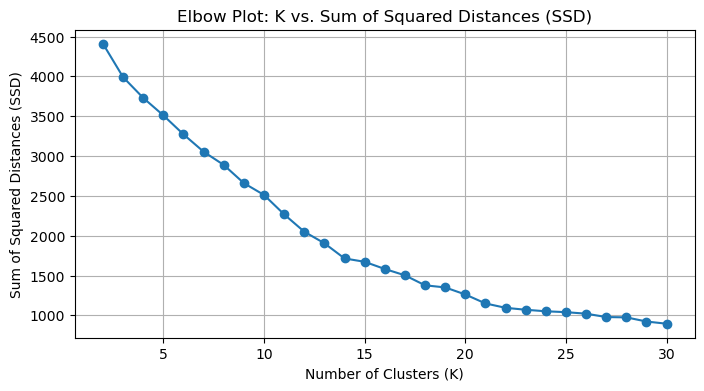

In [246]:
# Plot the "elbow" plot of K versus SSD

plt.figure(figsize=(8, 4))
plt.plot(range(2, 31), ssd, marker='o')
plt.title('Elbow Plot: K vs. Sum of Squared Distances (SSD)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid(True)
plt.show()

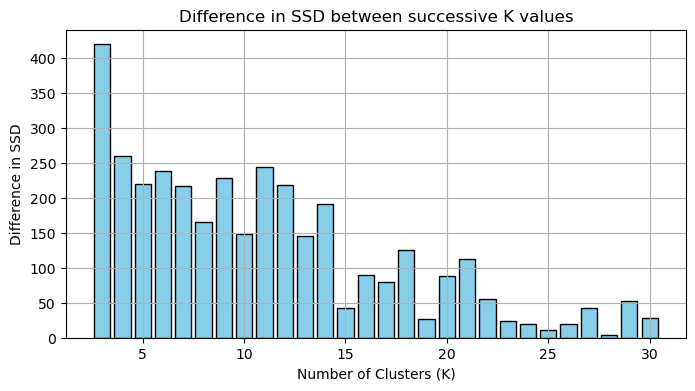

In [247]:
# SSD Barplot

# Calculate the differences in Sum of Squared Distances (SSD) between successive values of K

ssd_diff = [ssd[i] - ssd[i+1] for i in range(len(ssd)-1)]

plt.figure(figsize=(8, 4))
plt.bar(range(3, 31), ssd_diff, color='skyblue', edgecolor='black')
plt.title('Difference in SSD between successive K values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Difference in SSD')
plt.grid(True)
plt.show()

**Best k value**

+ Based on the elbow plot, the optimal number of clusters K can be identified where the curve starts to flatten, indicating diminishing returns in reducing the sum of squared distances (SSD) by increasing the number of clusters. 


+ The elbow plot indicates that K=23 is a reasonable choice for the number of clusters. 

+ While K=23 appears optimal, other values like K=4 and 𝐾=6 appear to be good choices for the number of clusters. Both values capture significant drops in SSD, and beyond these points, additional clusters yield minimal gains.

# The End!